In [ ]:
import pandas as pd
import plotly.express as px

In [ ]:
df = pd.read_csv('tims_dataset_fatalities.csv')
df = df.drop(['2012','2013','2019','2020','2021'],axis=1)
df[['2014','2015','2016','2017','2018']]=df[['2014','2015','2016','2017','2018']].apply(lambda x: x.str.replace(',', ''))
convert_dict = {'2014': float,
                '2015': float,
                '2016': float,
                '2017': float,
                '2018': float
                }
df[['2014','2015','2016','2017','2018']]=df[['2014','2015','2016','2017','2018']].astype(convert_dict)

In [ ]:
df[(df['2014']==0)] # 85 
df[(df['2015']==0)]# 78 
df[(df['2016']==0)] # 70
df[(df['2017']==0)] # 61
df[(df['2018']==0)] # 68


# df['Average']=df[['2014','2015','2016','2017','2018']].astype(convert_dict).mean(axis=1)

In [ ]:
df_yr_avg = df[['2014','2015','2016','2017','2018']].astype(convert_dict).mean(axis=0)
df_yr_avg = df_yr_avg.reset_index().rename(columns={'index':'Year',0:'Average'})
fig = px.line(df_yr_avg, x="Year", y="Average",
     labels={
             "Year": "Year",
             "Average": "Average collisions per year",
         },template='plotly_dark')
fig.show()

In [ ]:
df_filtered = df[(df['2014']>0) & (df['2015']>0) & (df['2016']>0) & (df['2017']>0) & (df['2018']>0)].reset_index(drop=True)

In [ ]:
top_10_df = df_filtered.sort_values(by=['Average'],ascending=False).iloc[1:,:].head(10)

In [ ]:
fig = px.bar(top_10_df, x='City', y='Average',template='plotly_dark',
         labels={
             "City": "City",
             "Average": "Average collisions per year",
         })
fig.show()

In [ ]:
df_filtered

In [6]:
from pyrosm import OSM
import pyrosm
import pandas as pd
import importlib
importlib.reload(pyrosm)
from pyrosm import OSM, get_data

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

/Users/abajaj/miniconda3/envs/capstone/lib/python3.10/site-packages/geopandas/_compat.py:123: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/Users/abajaj/miniconda3/envs/capstone/lib/python3.10/site-packages/pyrosm/utils/__init__.py:8: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyG

## [OSM Data for San Francisco](https://download.bbbike.org/osm/bbbike/SanFrancisco/)

In [7]:
# fp = get_data("sanfrancisco", directory="/Users/abajaj/Downloads/capstone")
# pyrosm.pyrosm.OSM(filepath, bounding_box=None)
# osm = OSM(filepath='/Users/abajaj/Downloads/capstone/SanFrancisco.osm.pbf')
fp = get_data("SanFrancisco")
print(fp)


/var/folders/zn/mlj400w95cj20_p11qyvj_km0000gn/T/pyrosm/SanFrancisco.osm.pbf


In [8]:
osm = OSM(fp)
# drive_net = osm.get_network(network_type="driving")
# drive_net.plot()

In [3]:
drive_net.columns

NameError: name 'drive_net' is not defined

In [ ]:
osm.conf.tags.available

In [5]:
# routes = ["bus", "ferry", "railway", "subway", "train", "tram", "trolleybus"]
# rails = ["tramway", "light_rail", "rail", "subway", "tram"]
# # highway	traffic_signals
# bus = ['yes']
# transit = osm.get_data_by_custom_criteria(custom_filter={
#                                         'highway': ['*'],
# #                                         'traffic_sign':['*'],
#                                         'public_transport': True,},
#                                         # Keep data matching the criteria above
#                                         filter_type="keep",
#                                         # Do not keep nodes (point data)    
#                                         keep_nodes=False, 
#                                         keep_ways=True, 
#                                         keep_relations=True)

In [ ]:
# osm.conf.tags.available

In [6]:
# osm.conf.tags.route

In [14]:
highways = osm.get_data_by_custom_criteria(custom_filter={'highway':True},
                    # Keep data matching the criteria above
                    filter_type="keep",
                    # Do not keep nodes (point data)    
                    keep_nodes=False, 
                    keep_ways=True, 
                    keep_relations=False)

In [15]:
highways.head()

,access,area,bicycle,bridge,busway,cycleway,est_width,foot,footway,highway,junction,lanes,lit,maxspeed,motorcar,motor_vehicle,name,oneway,overtaking,path,psv,ref,service,segregated,sidewalk,smoothness,surface,tracktype,tunnel,turn,width,id,timestamp,version,tags,osm_type,geometry
0,None,None,no,None,None,None,None,None,None,motorway,None,4,None,65 mph,None,None,Bayshore Freeway,yes,None,None,None,US 101,None,None,None,None,None,None,None,None,None,4311275,0,-1,"{""NHS"":""STRAHNET"",""hgv"":""designated"",""hgv:nati...",way,"MULTILINESTRING ((-122.40673 37.65521, -122.40..."
1,None,None,no,yes,None,None,None,None,None,motorway,None,4,None,65 mph,None,None,Bayshore Freeway,yes,None,None,None,US 101,None,None,None,None,None,None,None,None,None,4970206,0,-1,"{""NHS"":""STRAHNET"",""hgv"":""designated"",""hgv:nati...",way,"MULTILINESTRING ((-122.40696 37.65523, -122.40..."
2,None,None,None,None,None,None,None,None,None,residential,None,None,None,None,None,None,Macondray Lane,None,None,None,None,None,None,None,None,None,None,None,None,None,None,5004035,0,-1,None,way,"LINESTRING (-122.41648 37.79905, -122.41733 37..."
3,None,None,no,yes,None,None,None,None,None,motorway,None,4,None,65 mph,None,None,Bayshore Freeway,yes,None,None,None,US 101,None,None,None,None,None,None,None,None,None,5071579,0,-1,"{""NHS"":""STRAHNET"",""hgv"":""designated"",""hgv:nati...",way,"MULTILINESTRING ((-122.40691 37.65317, -122.40..."
4,None,None,no,None,None,None,None,None,None,motorway,None,5,None,55 mph,None,None,James Lick Freeway,yes,None,None,None,US 101,None,None,None,None,concrete,None,None,None,None,5071582,0,-1,"{""NHS"":""STRAHNET"",""hgv"":""designated"",""hgv:nati...",way,"MULTILINESTRING ((-122.39889 37.71689, -122.39..."


In [16]:
columns_drop = ['access','area','busway','est_width','foot','junction',
                'motorcar','motor_vehicle','overtaking','path','psv','segregated',
                'smoothness','tracktype','tunnel','turn','width','timestamp',]
highways = highways.drop(columns_drop,axis=1)

In [17]:
from IPython.display import display
for col in list(highways.columns):
    print(col)
    display(highways[col].value_counts(dropna=False,normalize=True).rename_axis('unique_values')
            .reset_index(name='counts'))
  

bicycle


,unique_values,counts
0,None,0.935827
1,no,0.028013
2,yes,0.020383
3,designated,0.012741
4,dismount,0.002024
5,permissive,0.000658
6,private,0.000342
7,discouraged,0.000013


bridge


,unique_values,counts
0,None,0.983539
1,yes,0.016043
2,movable,0.000215
3,boardwalk,0.000190
4,gangway,0.000013


cycleway


,unique_values,counts
0,None,0.972734
1,lane,0.012248
2,shared_lane,0.010982
3,track,0.001721
4,no,0.001113
5,crossing,0.000822
6,separate,0.000380


footway


,unique_values,counts
0,None,0.818969
1,sidewalk,0.090756
2,crossing,0.089402
3,access_aisle,0.000519
4,ramp,0.000304
5,traffic_island,0.000025
6,square,0.000013
7,link,0.000013


highway


,unique_values,counts
0,service,0.300635
1,footway,0.298294
2,residential,0.144327
3,secondary,0.051217
4,tertiary,0.045106
5,primary,0.035022
6,steps,0.029379
7,path,0.021357
8,motorway_link,0.014740
9,unclassified,0.011450


lanes


,unique_values,counts
0,None,0.841654
1,2,0.070398
2,3,0.040134
3,4,0.020712
4,1,0.019788
5,5,0.006200
6,6,0.000962
7,7,0.000101
8,8,0.000051


lit


,unique_values,counts
0,None,0.883395
1,yes,0.104535
2,no,0.012058
3,24/7,0.000013


maxspeed


,unique_values,counts
0,None,0.911559
1,25 mph,0.026203
2,35 mph,0.017764
3,30 mph,0.013171
4,20 mph,0.008237
5,50 mph,0.004998
6,45 mph,0.004390
7,65 mph,0.004074
8,55 mph,0.003619
9,40 mph,0.002505


name


,unique_values,counts
0,None,0.668936
1,El Camino Real,0.004821
2,Geary Boulevard,0.003100
3,Market Street,0.002961
4,3rd Street,0.002961
...,...,...
6464,Ysabel Drive,0.000013
6465,South Maple Avenue,0.000013
6466,Red Leaf Court,0.000013
6467,Sharon Court,0.000013


oneway


,unique_values,counts
0,None,0.785136
1,yes,0.198973
2,no,0.015790
3,-1,0.000089
4,alternating,0.000013


ref


,unique_values,counts
0,None,0.976618
1,CA 82,0.005757
2,US 101,0.004947
3,CA 1,0.004327
4,CA 35,0.002530
5,I 280,0.001695
6,CA 131,0.001038
7,I 80,0.000709
8,US 101;CA 1,0.000582
9,I 580,0.000569


service


,unique_values,counts
0,None,0.861822
1,parking_aisle,0.101776
2,driveway,0.025280
3,alley,0.006807
4,busway,0.002113
5,drive-through,0.001708
6,emergency_access,0.000342
7,1,0.000051
8,fuel,0.000051
9,slipway,0.000025


sidewalk


,unique_values,counts
0,None,0.902285
1,both,0.042829
2,right,0.025027
3,no,0.014158
4,separate,0.010868
5,left,0.003922
6,none,0.000683
7,yes,0.000228


surface


,unique_values,counts
0,None,0.726201
1,asphalt,0.167266
2,concrete,0.056607
3,paved,0.020155
4,dirt,0.009072
5,paving_stones,0.006339
6,unpaved,0.003910
7,ground,0.002480
8,compacted,0.002024
9,wood,0.001215


id


,unique_values,counts
0,4311275,0.000013
1,696062341,0.000013
2,697246652,0.000013
3,697246651,0.000013
4,697246650,0.000013
...,...,...
79031,406946353,0.000013
79032,406946352,0.000013
79033,406946351,0.000013
79034,406946350,0.000013


version


,unique_values,counts
0,-1,1.0


tags


,unique_values,counts
0,None,0.552065
1,"{""crossing"":""marked""}",0.029139
2,"{""crossing"":""unmarked""}",0.006807
3,"{""layer"":""1""}",0.005883
4,"{""layer"":""-1""}",0.003960
...,...,...
14959,"{""parking:lane:both"":""parallel"",""parking:lane:...",0.000013
14960,"{""NHS"":""STRAHNET"",""name:etymology:wikidata"":""Q...",0.000013
14961,"{""NHS"":""STRAHNET"",""cycleway:right"":""no"",""name:...",0.000013
14962,"{""lcn_ref"":""210"",""tiger:cfcc"":""A41"",""tiger:cou...",0.000013


osm_type


,unique_values,counts
0,way,1.0


geometry


,unique_values,counts
0,"LINESTRING (-122.38949 37.61271, -122.38981 37...",0.000025
1,"LINESTRING (-122.38890 37.61359, -122.38922 37...",0.000025
2,"LINESTRING (-122.38979 37.61222, -122.38947 37...",0.000025
3,"LINESTRING (-122.38920 37.61310, -122.38888 37...",0.000025
4,"MULTILINESTRING ((-122.32316 37.88931, -122.32...",0.000013
...,...,...
79027,"LINESTRING (-122.46210 37.87690, -122.46207 37...",0.000013
79028,"MULTILINESTRING ((-122.47510 37.83450, -122.47...",0.000013
79029,"MULTILINESTRING ((-122.47547 37.83480, -122.47...",0.000013
79030,"LINESTRING (-122.50084 37.86676, -122.50074 37...",0.000013


In [18]:
display(highways['geometry'].apply(lambda x: x.is_simple).value_counts())#.is_simple
display(highways['geometry'].apply(lambda x: x.is_closed).value_counts())
#  'is_closed',
#  'is_empty',
#  'is_ring',
#  'is_simple',
#  'is_valid'

True     79035
False        1
Name: geometry, dtype: int64

False    79035
True         1
Name: geometry, dtype: int64

In [19]:
dir(highways['geometry'][0])#WkbType
# print(highways['geometry'][0].wkt)
for x in highways['geometry'][0].geoms:
    print(type(x))

<class 'shapely.geometry.linestring.LineString'>
<class 'shapely.geometry.linestring.LineString'>
<class 'shapely.geometry.linestring.LineString'>
<class 'shapely.geometry.linestring.LineString'>
<class 'shapely.geometry.linestring.LineString'>
<class 'shapely.geometry.linestring.LineString'>
<class 'shapely.geometry.linestring.LineString'>


In [20]:
dir(highways['geometry'][0].geoms[0])
highways['geometry'][0].geoms[0].length

0.0002783342235479181

<AxesSubplot: >

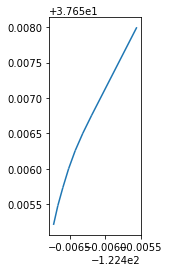

In [21]:
import geopandas as gpd
gpd.GeoSeries(highways['geometry'][0]).plot()

In [22]:
list(highways['geometry'][0].geoms)

[<LINESTRING (-122.407 37.655, -122.407 37.655)>,
 <LINESTRING (-122.407 37.655, -122.407 37.656)>,
 <LINESTRING (-122.407 37.656, -122.407 37.656)>,
 <LINESTRING (-122.407 37.656, -122.406 37.656)>,
 <LINESTRING (-122.406 37.656, -122.406 37.657)>,
 <LINESTRING (-122.406 37.657, -122.406 37.657)>,
 <LINESTRING (-122.406 37.657, -122.406 37.658)>]

In [23]:
highways.head()

,bicycle,bridge,cycleway,footway,highway,lanes,lit,maxspeed,name,oneway,ref,service,sidewalk,surface,id,version,tags,osm_type,geometry
0,no,None,None,None,motorway,4,None,65 mph,Bayshore Freeway,yes,US 101,None,None,None,4311275,-1,"{""NHS"":""STRAHNET"",""hgv"":""designated"",""hgv:nati...",way,"MULTILINESTRING ((-122.40673 37.65521, -122.40..."
1,no,yes,None,None,motorway,4,None,65 mph,Bayshore Freeway,yes,US 101,None,None,None,4970206,-1,"{""NHS"":""STRAHNET"",""hgv"":""designated"",""hgv:nati...",way,"MULTILINESTRING ((-122.40696 37.65523, -122.40..."
2,None,None,None,None,residential,None,None,None,Macondray Lane,None,None,None,None,None,5004035,-1,None,way,"LINESTRING (-122.41648 37.79905, -122.41733 37..."
3,no,yes,None,None,motorway,4,None,65 mph,Bayshore Freeway,yes,US 101,None,None,None,5071579,-1,"{""NHS"":""STRAHNET"",""hgv"":""designated"",""hgv:nati...",way,"MULTILINESTRING ((-122.40691 37.65317, -122.40..."
4,no,None,None,None,motorway,5,None,55 mph,James Lick Freeway,yes,US 101,None,None,concrete,5071582,-1,"{""NHS"":""STRAHNET"",""hgv"":""designated"",""hgv:nati...",way,"MULTILINESTRING ((-122.39889 37.71689, -122.39..."


In [24]:
highways.surface.value_counts()

asphalt               13220
concrete               4474
paved                  1593
dirt                    717
paving_stones           501
unpaved                 309
ground                  196
compacted               160
wood                     96
concrete:plates          80
gravel                   78
sand                     77
brick                    30
bricks                   13
fine_gravel              11
sett                     10
metal                    10
grass                    10
woodchips                 7
tile                      6
2                         5
pebblestone               5
earth                     5
cobblestone               4
Pavement                  4
rock                      4
dirt/sand                 3
unhewn_cobblestone        2
ashpalt                   2
dirt;sand                 1
Concrete                  1
1                         1
asphalt:lanes             1
rocks                     1
grass_paver               1
stone               

In [25]:
highways.size

1501684

In [27]:
highways.to_file('/Users/abajaj/Downloads/capstone/highway_sf.gis')